# <span style = "color:IndianRed; font-size:20px"> Brain Tumor Classification (MRI)</span>

#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

#### Fetch the training Data

In [2]:
glioma = glob.glob('Brain_tumor/Training/glioma_tumor/*.jpg')
meninglioma = glob.glob('Brain_tumor/Training/meningioma_tumor/*.jpg')
notumor = glob.glob('Brain_tumor/Training/no_tumor/*.jpg')
pituitary = glob.glob('Brain_tumor/Training/pituitary_tumor/*.jpg')

#### Fetch the testing data

In [3]:
glioma_test = glob.glob('Brain_tumor/Testing/glioma_tumor/*.jpg')
meninglioma_test = glob.glob('Brain_tumor/Testing/meningioma_tumor/*.jpg')
notumor_test = glob.glob('Brain_tumor/Testing/no_tumor/*.jpg')
pituitary_test = glob.glob('Brain_tumor/Testing/pituitary_tumor/*.jpg')

#### Find the number of images of all classes in the Training set

In [4]:
print("Number of images in Training are:")
print("Glioma:",len(glioma))
print("Meninglioma:",len(meninglioma))
print("No Tumor:",len(notumor))
print("Pituitary:",len(pituitary))

Number of images in Training are:
Glioma: 84
Meninglioma: 72
No Tumor: 72
Pituitary: 84


#### Find the number of images of all classes in the testing set

In [5]:
print("Number of images in Testing are:")
print("Glioma:",len(glioma_test))
print("Meninglioma:",len(meninglioma_test))
print("No Tumor:",len(notumor_test))
print("Pituitary:",len(pituitary_test))

Number of images in Testing are:
Glioma: 24
Meninglioma: 24
No Tumor: 24
Pituitary: 24


#### For Training set

In [7]:
image = []
label = []

for i in glioma:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in meninglioma:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in notumor:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in pituitary:
    img = plt.imread(i)
    image.append(img)
    label.append(3)
    

In [12]:
label_dict = {0:'glioma',1:'meningioma',2:'notumor',3:'pituitary'}

#### For Testing set

In [13]:
image_test = []
label_test = []

for i in glioma_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in meninglioma_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in notumor_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in pituitary_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

#### Shuffle both image list and label list (In both Training and testing set)

In [14]:
image , label = shuffle(image, label , random_state= 100)

In [15]:
image_test , label_test = shuffle(image_test, label_test , random_state= 100)

#### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

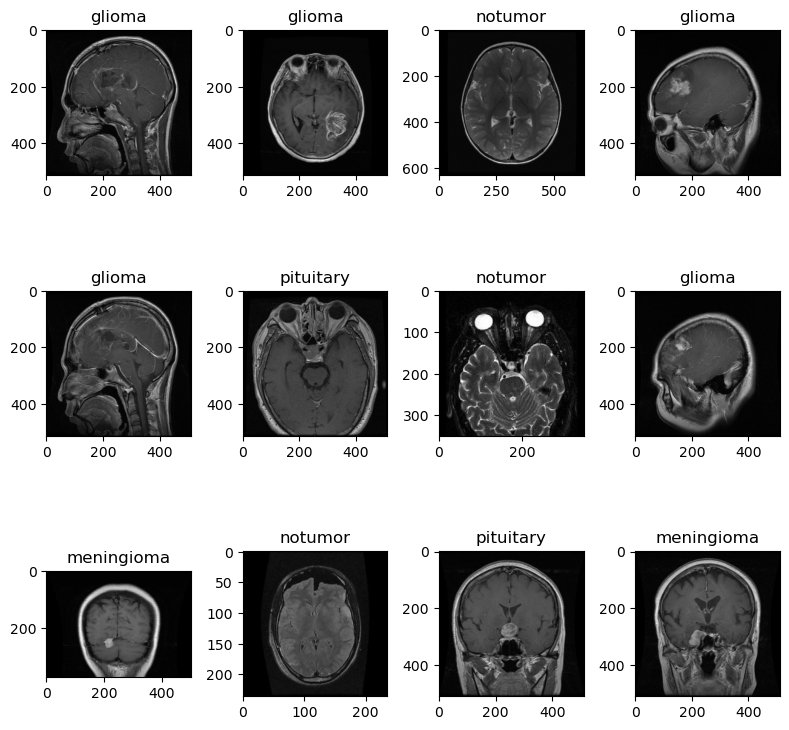

In [18]:
plt.figure(figsize = (8,8))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_dict[label[i]])
    
plt.tight_layout()

#### Check the shape of the first 10 images in our list (Either from training or test set)

In [19]:
images = image[:10]

for i in images:
    print(i.shape)

(512, 512, 3)
(512, 512, 3)
(630, 630, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(350, 350, 3)
(512, 512, 3)
(369, 503, 3)
(236, 236, 3)


#### Reshape the images to 224x224( For both training and testing set)

In [20]:
X_train = []

for i in image:
    X_train.append(resize(i, (224,224,3)))

In [21]:
X_test = []

for i in image_test:
    X_test.append(resize(i, (224,224,3)))

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)

#### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [23]:
y_train = np.array(label)
y_test = np.array(label_test)

#### Plot some of our reshaped images

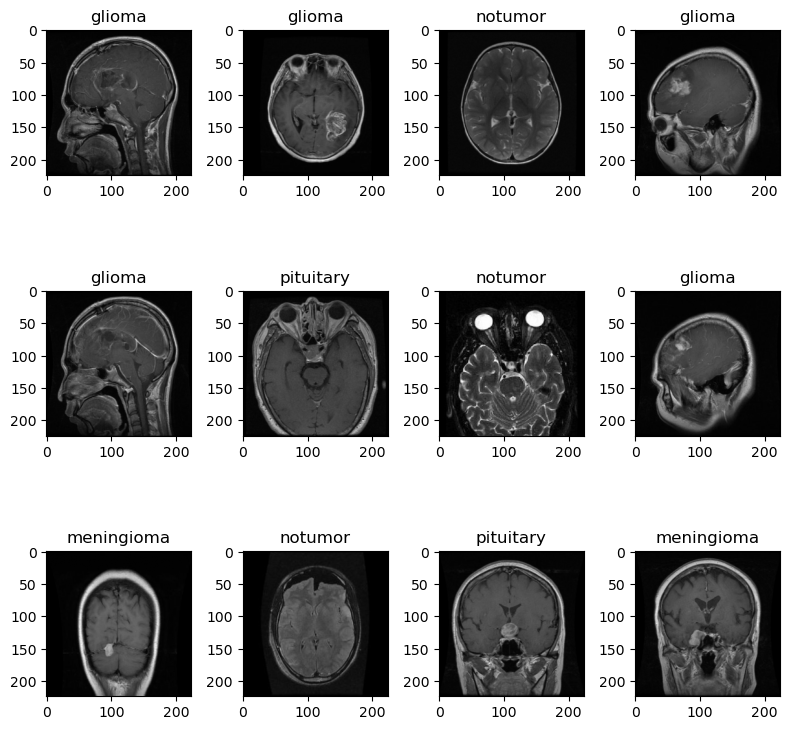

In [24]:
plt.figure(figsize = (8,8))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(label_dict[y_train[i]])
    
plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [25]:
print(f"Shape of X_train is:{X_train.shape}\nShape of X_test is:{X_test.shape}\nShape of y_train is:{y_train.shape}\nShape of y_test is:{y_test.shape}")

Shape of X_train is:(312, 224, 224, 3)
Shape of X_test is:(96, 224, 224, 3)
Shape of y_train is:(312,)
Shape of y_test is:(96,)


#### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (224,224,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

#### Compile the model

In [27]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

#### Train the model

In [29]:
model.fit(X_train,y_train,epochs= 5,validation_split=0.05)

Epoch 1/5
10/10 [==============================] - 16s 1s/step - loss: 1.4188 - accuracy: 0.3446 - val_loss: 1.1841 - val_accuracy: 0.6250
Epoch 2/5
10/10 [==============================] - 12s 1s/step - loss: 1.0032 - accuracy: 0.6892 - val_loss: 0.6975 - val_accuracy: 0.8125
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.4995 - accuracy: 0.8311 - val_loss: 0.6364 - val_accuracy: 0.9375
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.2401 - accuracy: 0.9122 - val_loss: 0.7529 - val_accuracy: 0.8750
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.1060 - accuracy: 0.9662 - val_loss: 0.7158 - val_accuracy: 0.8750


#### Evaluate the model

In [71]:
model.evaluate(X_train,y_train)

10/10 [==============================] - 8s 803ms/step - loss: 0.1365 - accuracy: 0.9647


[0.13646499812602997, 0.9647436141967773]

#### Make predictions with X_test

In [30]:
predict = model.predict(X_test)

3/3 [==============================] - 2s 463ms/step


In [31]:
predict[0]

array([0.99964523, 0.9996842 , 0.9994576 , 0.9782284 ], dtype=float32)

#### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [32]:
y_pred  = [np.argmax(i) for i in predict]

In [33]:
y_pred[:5]

[1, 2, 3, 2, 1]

#### Plot X_test with label from our prediction

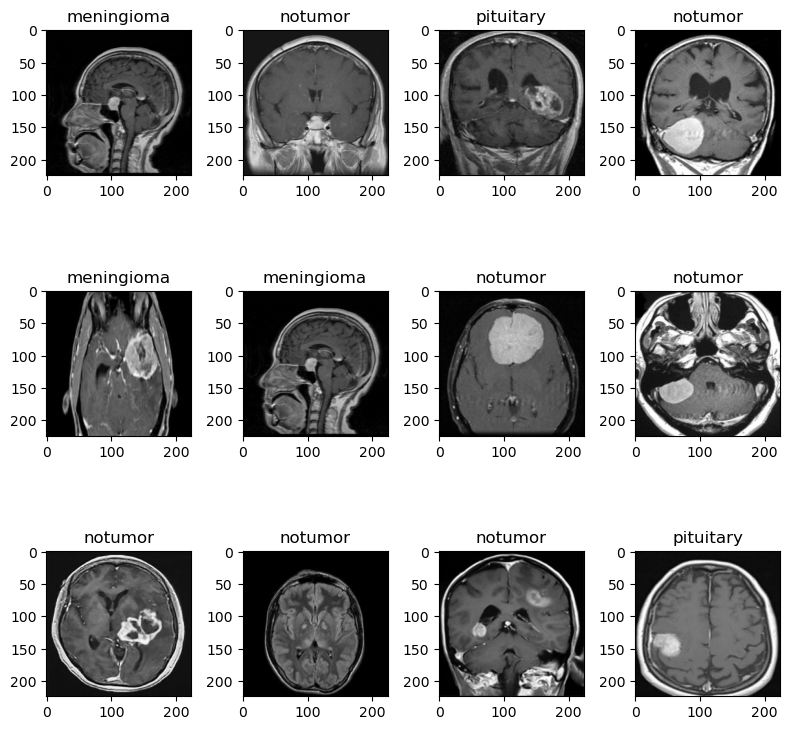

In [34]:
plt.figure(figsize = (8,8))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[y_pred[i]])
    
plt.tight_layout()

#### Visualize confusion matrix on a heatmap

<Axes: >

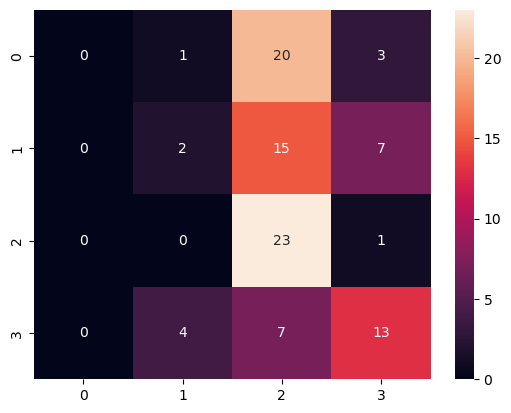

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)